Import Library

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 7.0 MB/s eta 0:00:00


Load Dataset

In [2]:
# ganti path sesuai file kamu
df = pd.read_csv("data-manual.csv", sep=';')

# pastikan kolom sesuai
df = df[['Review', 'Label']]
df.head()

,Review,Label
0,"Makanan laut segar, harga terjangkau, cocok un...",Positif
1,Langsung di sambut dengan ramah n megah,NaN
2,Salah satu tempat makan seafood di seputaran G...,NaN
3,"Lokasi strategis, parkir mobil cuma bisa di te...",NaN
4,"Enak, ga terlalu pricey, worth it",NaN


Preprocessing Teks

In [3]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def preprocessing(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = stemmer.stem(text)
    return text

df['Review_clean'] = df['Review'].apply(preprocessing)


TF-IDF Vectorization

In [6]:
indonesian_stopwords = [
    "yang", "untuk", "pada", "ke", "para", "namun", "menurut", "antara", "dia", "mereka",
    "dengan", "adalah", "dan", "dalam", "ini", "itu", "atau", "tidak", "akan", "juga",
    "bisa", "bahwa", "oleh", "saja", "dari", "saya", "kami", "anda", "kita", "kamu",
    "di", "dengan", "sebagai", "adalah", "ini", "itu", "dan", "atau", "tidak", "ada",
    "akan", "agar", "jika", "maka", "kemudian", "lalu", "tetapi", "serta", "setelah", "sebelum",
    "saat", "ketika", "karena", "sebab", "untuk", "dari", "pada", "kepada", "oleh", "dengan",
    "bagi", "seperti", "daripada", "tanpa", "lain", "lagi", "hanya", "pun", "saja", "tiap",
    "setiap", "seluruh", "semua", "berbagai", "suatu", "beberapa", "banyak", "sedikit", "cukup",
    "lebih", "kurang", "paling", "sangat", "amat", "bukan", "belum", "jangan", "bisa", "dapat",
    "harus", "mesti", "wajib", "boleh", "mungkin", "perlu", "coba", "mari", "ayo", "silakan",
    "mohon", "tolong", "maaf", "terima", "kasih", "salam", "hai", "halo", "ya", "tidak",
    "bukan", "belum", "jangan", "sudah", "telah", "akan", "sedang", "masih", "pernah", "sering",
    "kadang", "selalu", "biasanya", "sekarang", "nanti", "kemarin", "dulu", "besok", "lusa", "kini"
]

tfidf = TfidfVectorizer(
    stop_words=indonesian_stopwords, #
    max_features=1000
)

X = tfidf.fit_transform(df['Review_clean'])

Elbow Method (Menentukan Jumlah Cluster)

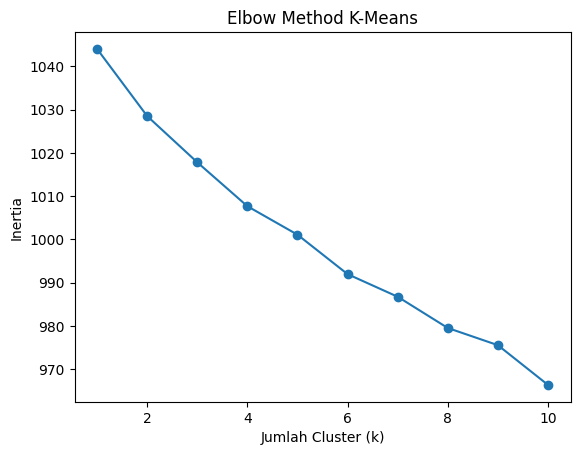

In [7]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method K-Means')
plt.show()


K-Means Clustering

In [8]:
k = 3
kmeans = KMeans(
    n_clusters=k,
    random_state=42,
    n_init=10
)

df['Cluster'] = kmeans.fit_predict(X)
df.head()


,Review,Label,Review_clean,Cluster
0,"Makanan laut segar, harga terjangkau, cocok un...",Positif,makan laut segar harga jangkau cocok untuk kel...,2
1,Langsung di sambut dengan ramah n megah,NaN,langsung di sambut dengan ramah n megah,0
2,Salah satu tempat makan seafood di seputaran G...,NaN,salah satu tempat makan seafood di putar gejay...,2
3,"Lokasi strategis, parkir mobil cuma bisa di te...",NaN,lokasi strategis parkir mobil cuma bisa di tep...,2
4,"Enak, ga terlalu pricey, worth it",NaN,enak ga terlalu pricey worth it,2


Topic Modeling (Topik per Cluster)

In [9]:
terms = tfidf.get_feature_names_out()

for i in range(k):
    print(f"\nCluster {i}")

    center_terms = kmeans.cluster_centers_[i]
    top_indices = center_terms.argsort()[-10:][::-1]

    for idx in top_indices:
        print(terms[idx])



Cluster 0
layan
ramah
cepat
enak
makan
tempat
saji
bersih
nya
bagus

Cluster 1
enak
harga
murah
jangkau
rasa
makan
nyaman
tempat
bersih
seafood

Cluster 2
makan
enak
nya
rasa
seafood
ikan
yg
banget
tempat
tapi


Bandingkan dengan Label Asli

In [10]:
pd.crosstab(df['Label'], df['Cluster'])


Cluster,0,1,2
Label,,,
Negatif,6,7,137
Positif,38,27,83


Visualisasi Cluster (PCA)

In [11]:
from sklearn.decomposition import PCA


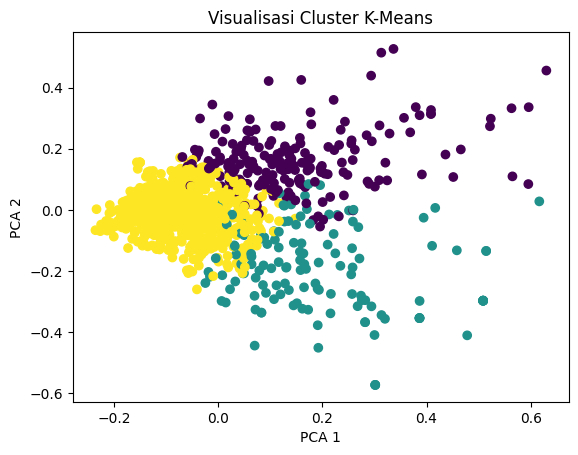

In [12]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.toarray())

plt.figure()
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=df['Cluster']
)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Cluster K-Means')
plt.show()


In [13]:
for i in range(k):
    print(f"\n===== Cluster {i} =====")
    print(df[df['Cluster'] == i]['Review'].head(5).to_string(index=False))



===== Cluster 0 =====
           Langsung di sambut dengan ramah n megah
Pelayanan yang ramah. Bau bakaran yang mengguga...
                   pelayanannya bagus sekali! 🤗🤩 …
                                  Pelayanan mantap
Selalu menjadi pilihan kalau mau makan seafood ...

===== Cluster 1 =====
Menu seafood istimewa rasa istimewa harga terja...
                             Harganya murah meriah
Tempat ini akan menjadi tujuan utama saya untuk...
Setelah seharian beraktifitas rasa lapar mimin ...
Tempat nyaman dan cukup luas, ada outdoornya, h...

===== Cluster 2 =====
Makanan laut segar, harga terjangkau, cocok unt...
Salah satu tempat makan seafood di seputaran Ge...
Lokasi strategis, parkir mobil cuma bisa di tep...
                 Enak, ga terlalu pricey, worth it
enak, lumayan murah karena porsinya besar. kehi...


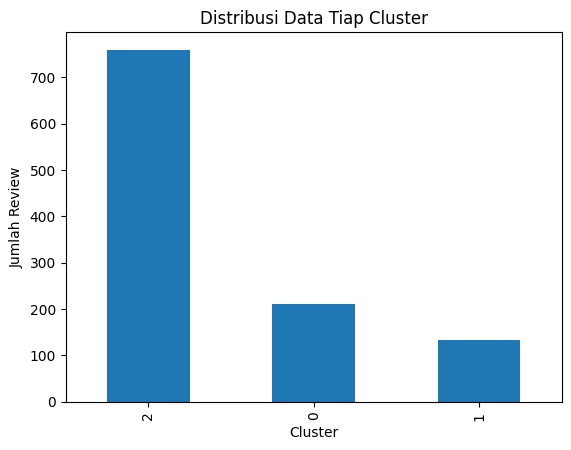

In [14]:
df['Cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Review')
plt.title('Distribusi Data Tiap Cluster')
plt.show()
